In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

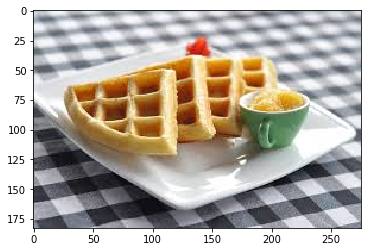

In [5]:
# read in the image
image = cv2.imread(r'D:\00_Python Scripts\Test\udacity_nano_computervision\CVND_Exercises-master\1_3_Types_of_Features_Image_Segmentation\images\waffle.jpg')

# copy of the image
image_copy = image.copy()
# change the color
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

#plt.figure(figsize = (10, 10))
plt.imshow(image_copy)

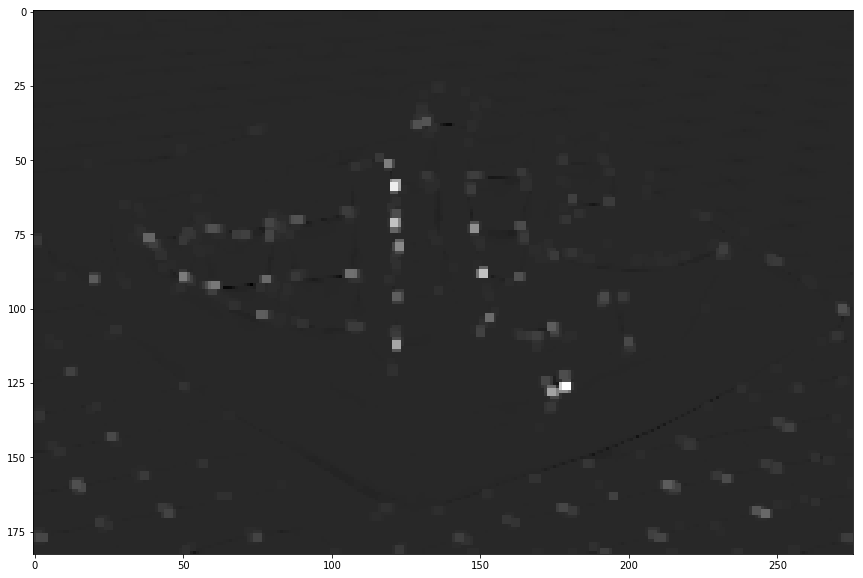

In [9]:
# convert image in gray scale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

# convert to 32 flaot since harris corner detection recogonizes only 32 float
gray = np.float32(gray)

# detect corners
dst = cv2.cornerHarris(gray, 2, 3, 0.04)#  float values, 2x 2 pixel windows, 3 size of the sobel kernal, constant like threshold
# this image should have corner points as brighter pixels and non corner points as darker pixels

# dilate the corner image to enhance the corner points
dst = cv2.dilate(dst, None) # dilation enhances the brighter points in the image


plt.figure(figsize=(20,10))
plt.imshow(dst, cmap = 'gray')

## Select and display the strong corners



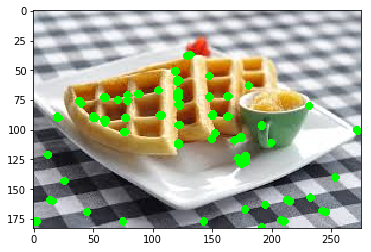

In [12]:
# Define a threshold for extracting strong corners
# this value may vary depending on the image
thresh = dst.max()/10 # atleast one tenth of the strong corners second try, to one percent

corner_image = image_copy.copy()

# iterate through all corner points and draw them

for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j, i]> thresh):
            cv2.circle(corner_image,(i,j),2,(0,255,0),1)

plt.imshow(corner_image)